## Personalisation and Machine Learning Assignment 3 ##
### Student No: 22009789

In this notebook, I will be looking at the Big 5 Personality dataset from Week 7, in which I will be looking at the biases and skewness of the data from this questionnaire.

In [1]:
#IMPORT CELL#
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Loading and Preparing the Dataset

In [2]:
data = pd.read_csv('data/data-small.csv')
pd.options.display.max_columns = 150

print('Number of participants: ', len(data))
data.head()

Number of participants:  50000


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY


In [3]:
# Clean out any empty rows so as to not affect the results.
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Number of participants after eliminating missing values:  49906


In [4]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):  #questions 1-10 of each trait measurement
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [5]:
# Load in questions databank
import json
with open("data/questions.json", "r") as fp:
    questions = json.load(fp)
traits = list(questions.keys())
colours = plt.colormaps.get("rainbow")

In [6]:
# Helper functions
def keys_for_trait(trait):
    return list(questions[trait].keys())

def questions_for_trait(trait):
    return list(questions[trait].values())

# Plot histogram for responses to each question
def vis_questions(trait, color):
    fig, ax = plt.subplots(2,5,figsize=(12,2))
    plt.subplots_adjust(bottom=0, top=2.5)
    qs = questions_for_trait(trait)
    codes = keys_for_trait(trait)
    for i in range(10):
        plot = ax[int(np.floor(i/5)),i%5]
        plot.hist(data[codes[i]], bins=14, color= color, alpha=.5)
        plot.set_title(qs[i], fontsize=8)
        plot.set_yticks([])
        plot.set_xticks(np.arange(0,6))

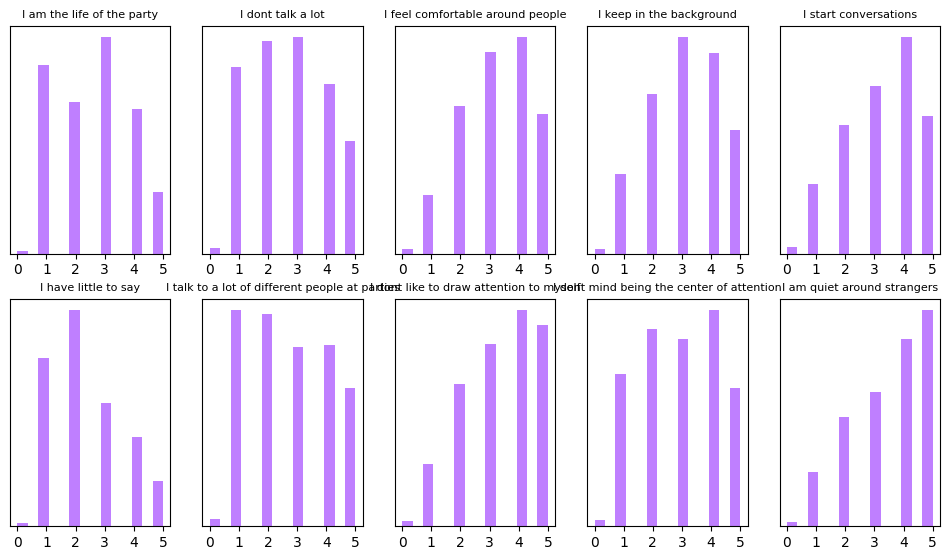

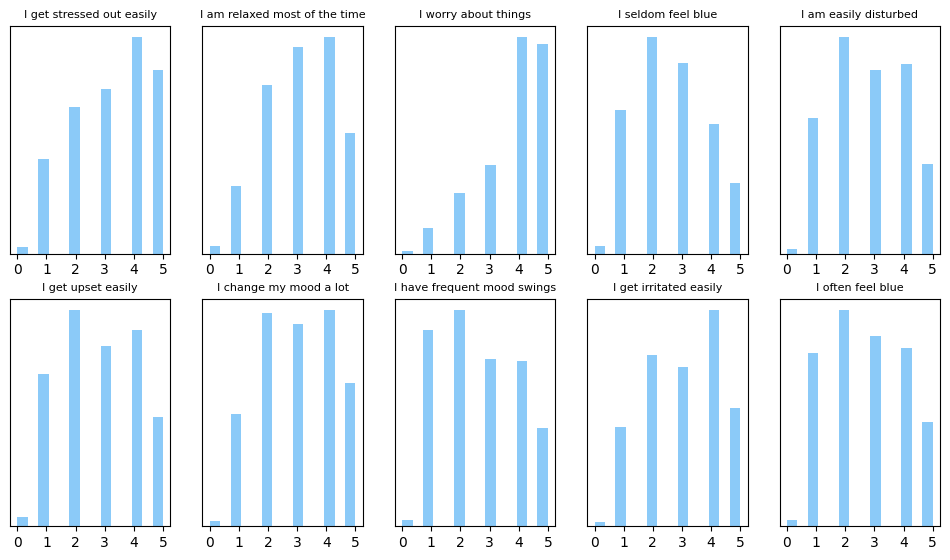

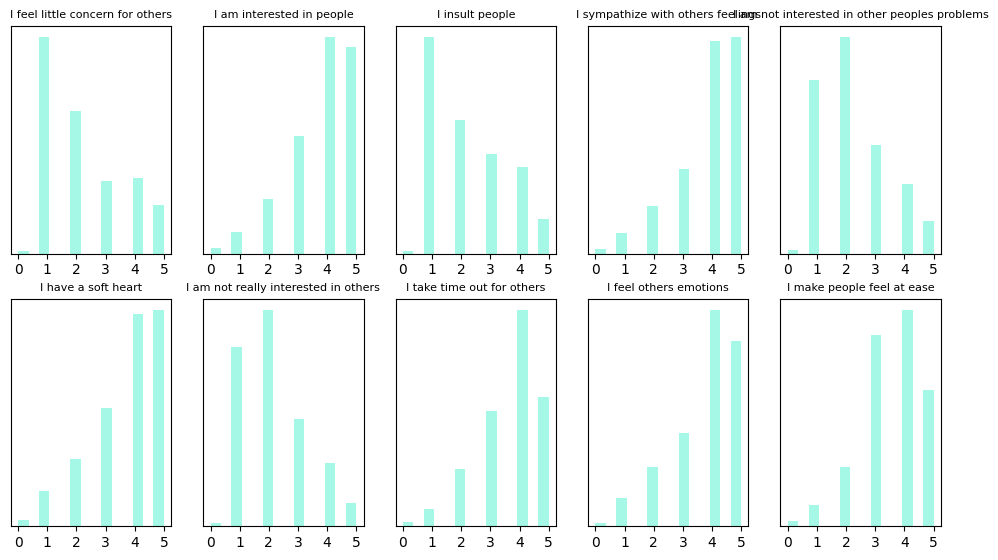

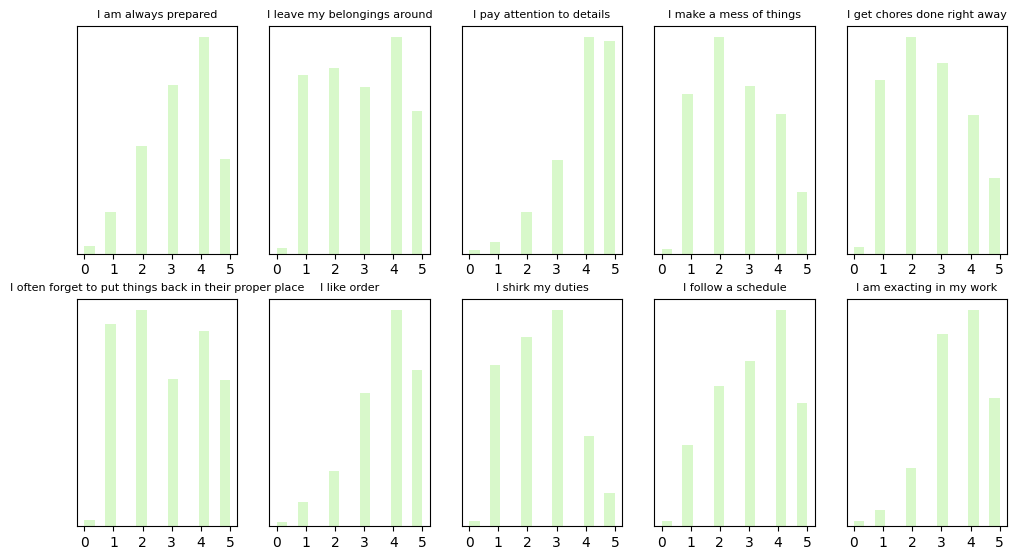

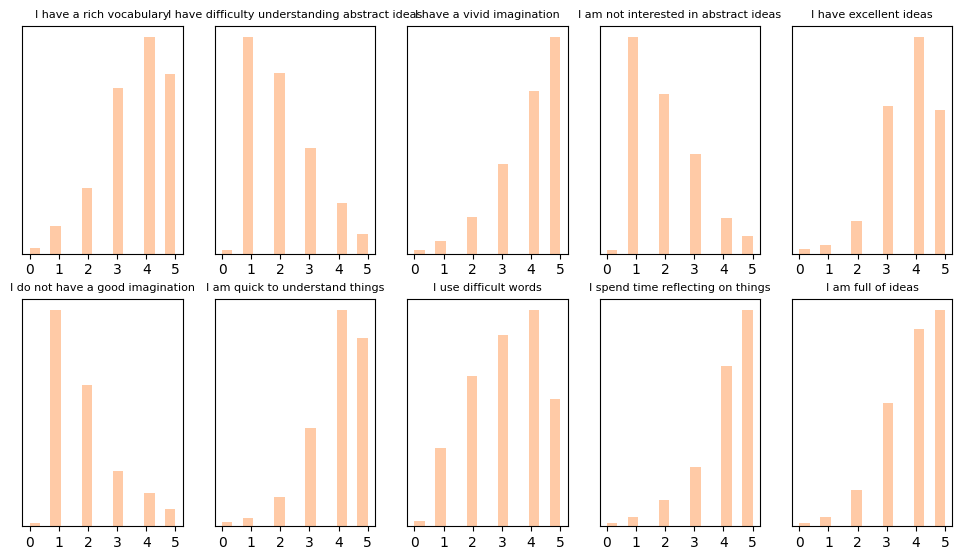

In [7]:
#Plot all questions
for i,t in enumerate(traits):
    vis_questions(t, colours(i/5)) 

## TASK 1

Obviously, some questions in every trait  are heavily skewed depending on the questions' sentiment, the positive questions are highly rated whilst the negative questions are negatively rated. It is an clear that self-judgement bias is involved. As such, we can find the average for each trait to get a more fair picture of the dataset participants.

In [14]:
# print(traits)
# ['EXT', 'EST', 'AGR', 'CSN', 'OPN'] are our trait codes, will use these seperately

# Get all the values of the Extroversion columns into a list
EXT_ALL = data.loc[:,keys_for_trait('EXT')]
# Find mean of all values for each participant and set this as a new column
data['EXT_AV'] = EXT_ALL.mean(axis=1)

# Do the same thing for the other four traits
EST_ALL = data.loc[:,keys_for_trait('EST')] # Neurotic
data['EST_AV'] = EST_ALL.mean(axis=1)

AGR_ALL = data.loc[:,keys_for_trait('AGR')] # Agreeable
data['AGR_AV'] = AGR_ALL.mean(axis=1)

CSN_ALL = data.loc[:,keys_for_trait('CSN')] # Conscientious
data['CSN_AV'] = CSN_ALL.mean(axis=1)

OPN_ALL = data.loc[:,keys_for_trait('OPN')] # Open
data['OPN_AV'] = OPN_ALL.mean(axis=1)

# Check dataframe
data.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,EXT_AV,EST_AV,AGR_AV,CSN_AV,OPN_AV
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR,2.6,3.7,3.0,2.0,2.6
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US,2.9,3.4,3.3,3.2,3.5
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US,3.4,2.5,3.6,2.6,3.6
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US,2.7,2.4,2.6,2.8,3.4
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY,2.7,3.1,2.7,2.8,2.7


Now that we have our traits averaged for each row, we can now find the overall mean for each trait over the entire dataset.

In [24]:
# Find means of each trait-average column
Extroversion = round(data['EXT_AV'].mean(),2)
Neurotic = round(data['EST_AV'].mean(),2)
Agreeable = round(data['AGR_AV'].mean(),2)
Conscientious = round(data['CSN_AV'].mean(),2)
Open = round(data['OPN_AV'].mean(),2)

# Create list of lists
means = [['Extroversion', Extroversion], ['Neurotic', Neurotic], 
        ['Agreeable', Agreeable], ['Conscientious', Conscientious],
        ['Open', Open]]
  
# Create dataframe for trait means
trait_means = pd.DataFrame(means, columns=['Trait', 'Overall_mean'])

print('The overall means of each Big 5 Personality traits are as follows:')
trait_means


The overall means of each Big 5 Personality traits are as follows:


,Trait,Overall_mean
0,Extroversion,3.02
1,Neurotic,3.03
2,Agreeable,3.16
3,Conscientious,3.13
4,Open,3.27


Looking at all the traits, their averages are about the same (3), This means that, despite the skewness of each question, the question scores in each trait balances them out to be on average the same result.

## TASK 2 ##

Next is to rank the five traits on how much negative and postive skew their question responses are.


In [36]:
from scipy.stats import skew

# List the skewness of each question for each trait
print('EXT: \n',skew(EXT_ALL))
print('EST: \n',skew(EST_ALL))
print('AGR \n',skew(AGR_ALL))
print('CSN: \n',skew(CSN_ALL))
print('OPN: \n',skew(OPN_ALL))

EXT: 
 [ 0.14922895  0.15259658 -0.27929551 -0.17944379 -0.37327876  0.54893332
  0.1505655  -0.38937112 -0.048837   -0.53997301]
EST: 
 [-0.32740862 -0.22179281 -0.95354929  0.23783091  0.07559878  0.04822048
 -0.07243292  0.22429205 -0.1662107   0.13724153]
AGR 
 [ 0.70738889 -0.93541866  0.59380001 -1.0989636   0.68285983 -0.86298542
  0.71242411 -0.79376441 -0.90350024 -0.62080356]
CSN: 
 [-0.4707216  -0.02959608 -1.06320008  0.27396715  0.26091654  0.11178596
 -0.78161777  0.28015458 -0.287634   -0.59558841]
OPN: 
 [-0.71196567  0.81120632 -1.08772555  0.89280697 -0.80998916  1.15731156
 -1.11853166 -0.26278892 -1.36825321 -0.93966932]


For each trait, we get an array of the skewness of each of the ten questions. To create our rankings, we can create a custom scoring system to which the level of skewness of each question will determine the overall score of each trait.

For each trait's question, we can create an algorithm that will atta

In [70]:
#Testing scroing code with one of the traits

test_arr = abs(skew(OPN_ALL)) # Using absolute values to make things easier

skew_scores = []
for s in test_arr:
    if s <= 0.25: # Question responses are balanced
        skew_scores.append(1)
    elif s > 0.25 and s < 0.75: # Question responses are moderately skewed
        skew_scores.append(2) 
    elif s >= 0.75: # Question responses are very skewed
        skew_scores.append(3)
        
print(skew_scores)
print('The test skew score is', sum(skew_scores))

[2, 3, 3, 3, 3, 3, 3, 2, 3, 3]
The test skew score is 28


In [74]:
trait_skews = [abs(skew(EXT_ALL)), abs(skew(EST_ALL)),
               abs(skew(AGR_ALL)), abs(skew(CSN_ALL)),
               abs(skew(OPN_ALL))]

trait_skew_scores = []

for item in trait_skews:
    skew_scores = []
    for s in item:
        if s <= 0.25: # Question responses are balanced
            skew_scores.append(1)
        elif s > 0.25 and s < 0.75: # Question responses are moderately skewed
            skew_scores.append(2) 
        elif s >= 0.75: # Question responses are very skewed
            skew_scores.append(3)
        sumskew = sum(skew_scores) 
    trait_skew_scores.append(sumskew)

trait_skew_scores

[15, 13, 25, 20, 28]

In [75]:
# Make dataframe for traits and their skew scores

skews = {'trait': traits, 'score': trait_skew_scores}
df = pd.DataFrame(skews)

# Sort traits in ascending order (i.e most balanced to most skewed)
df.sort_values(by=['score'], axis = 0, ascending=True)

,trait,score
1,EST,13
0,EXT,15
3,CSN,20
2,AGR,25
4,OPN,28


From the dataframe, we can see that the 'Neuroticism' trait questions have the the most balanced responses whereas the 'Openess to Experience' questions have the most skewed responses.